In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('bank-full.csv', delimiter=";")

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [5]:
num_attribs1 = ["duration","age"]
num_attribs2 = ["education","marital"]
cat_attribs = ["job"]

In [6]:
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

full_pipeline1 = ColumnTransformer([
    ("num", num_pipeline, num_attribs1),
])

full_pipeline2 = ColumnTransformer([
    ("num", num_pipeline, num_attribs2),
])

full_pipeline3 = ColumnTransformer([
    ("num", num_pipeline, num_attribs1),
    ("cat", OneHotEncoder(), cat_attribs),
])


In [7]:
def learning(full_pipeline):
    ac_score = []
    
    skf = StratifiedKFold(n_splits=100)
    
    for train_index, test_index in skf.split(data, data["y"]):
        
        data_train, data_test = data.loc[train_index], data.loc[test_index]
        
        X_train = full_pipeline.fit_transform(data_train)
        y_train = np.array(data_train["y"])
        
        X_test = full_pipeline.transform(data_test)
        y_test = np.array(data_test["y"])
        
        model = SGDClassifier(max_iter=1000, loss="hinge")
        model.fit(X_train, y_train)
        ac_score.append(accuracy_score(y_test, model.predict(X_test)))
        
    print("------------------")
    print("Prediction moyenne :", np.mean(ac_score))
    return np.mean(ac_score)

In [8]:
learning(full_pipeline1)

------------------
Prediction moyenne : 0.8833241028345934


0.8833241028345934

In [9]:
learning(full_pipeline3)

------------------
Prediction moyenne : 0.8843852194807479


0.8843852194807479

In [10]:
#learning(full_pipeline2)

In [11]:
X = full_pipeline3.fit_transform(data)
y = np.array(data["campaign"])

model = SGDClassifier(max_iter=1000, loss='hinge')
model.fit(X,y)

SGDClassifier()

In [12]:
X = full_pipeline1.fit_transform(data)
y = np.array(data["campaign"])

model = SGDClassifier(max_iter=1000, loss='hinge')
model.fit(X,y)

SGDClassifier()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

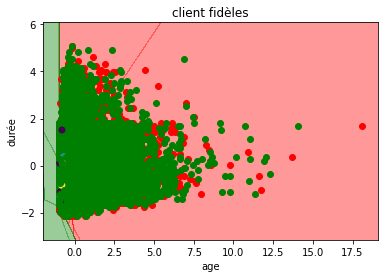

In [13]:
from matplotlib.colors import ListedColormap

X = full_pipeline1.transform(data)
X1 = np.arange(start = X[:,0].min() -1, stop = X[:,0].max() + 1, step = 0.01)
X2 = np.arange(start = X[:,1].min() -1, stop = X[:,1].max() + 1, step = 0.01)

X1, X2 = np.meshgrid(X1,X2)

Z = model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
                 
plt.contourf(X1, X2, Z,
            alpha = 0.4, cmap = ListedColormap(('red', 'green')));
                 
for i, j in enumerate(np.unique(y)):
    plt.scatter(X[y == j, 0], X[y == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
                  
plt.title('client fidèles')
plt.xlabel('age')
plt.ylabel('durée')

plt.show()

On peut en déduire que les clients restent en moyennes 2 ans

Et qu'ils sont assez jeunes

In [14]:
from sklearn.kernel_approximation import PolynomialCountSketch, RBFSampler

num_attribs = ["duration","age"]
cat_attribs = ['balance']

num_pipeline1 = Pipeline([
    ('std_scaler', StandardScaler()),
    ('poly', PolynomialCountSketch(degree=3))
])

num_pipeline2 = Pipeline([
    ('std_scaler', StandardScaler()),
    ('RBFGaussian', RBFSampler(gamma=0.5))
])

full_pipeline1 = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
])

full_pipeline2 = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
])





In [15]:
learning(full_pipeline1)
learning(full_pipeline2)

------------------
Prediction moyenne : 0.883656400789232
------------------
Prediction moyenne : 0.8829037488522925


0.8829037488522925

In [16]:
X = full_pipeline2.fit_transform(data)
y = np.array(data["balance"])

model = SGDClassifier(max_iter=1000, loss='hinge')
model.fit(X,y)

SGDClassifier()

In [20]:
from matplotlib.colors import ListedColormap

X = data["age"].values
y = data["duration"].values

X,y

x1 = np.arange(start = X.min() - 1, stop = X[:, 0].max() +1, step = 1)
x2 = np.arange(start = X.min() - 1, stop = X[:, 1].max() +1, step = 100)

# x3 = np.arange(start = X.min() - 1, stop = X[:, 1].max() +1, step = 100)

x1,x2 = np.meshgrid(x1,x2)


age = x1.ravel()
job = np.zeros(len(age))
marital = np.zeros(len(age))
education = np.zeros(len(age))
default = np.zeros(len(data["age"]))
balance = np.zeros(len(data["age"]))
housing = np.zeros(len(data["age"]))
loan = np.zeros(len(data["age"]))
contact = np.zeros(len(data["age"]))
day = np.zeros(len(data["age"]))
month = np.zeros(len(data["age"]))
duration = x2.ravel()
campaign = np.zeros(len(data["age"]))
pdays = np.zeros(len(data["age"]))
previous = np.zeros(len(data["age"]))
poutcome = np.zeros(len(data["age"]))
y = np.zeros(len(data["age"]))

data2 = pd.DataFrame(np.array([age, job, marital, education, default, balance, housing ,loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]).T,
columns=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing' ,'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'])

data2
X_predict = full_pipeline2.transform(data2)

z = model.predict(full_pipeline2.transform(data2)).reshape(x1.shape)

plt.contourf(x1, x2, z,
           alpha = 0.4, cmap = ListedColormap(('red', 'green')));
for i, j in enumerate(np.unique(y)):
    plt.scatter(x[y == j, 0], x[y == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('client fidèles')
plt.xlabel('age')
plt.ylabel('durée')

plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [28]:
np.array([age, job, marital, education, default, balance, housing ,loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]).T

<ipython-input-28-15d6e0801e95>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([age, job, marital, education, default, balance, housing ,loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]).T


array([array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
              17,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
              16, 17,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
              15, 16, 17,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
              14, 15, 16, 17,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
              13, 14, 15, 16, 17,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
              12, 13, 14, 15, 16, 17,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
              11, 12, 13, 14, 15, 16, 17,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
              10, 11, 12, 13, 14, 15, 16, 17,  0,  1,  2,  3,  4,  5,  6,  7,  8,
               9, 10, 11, 12, 13, 14, 15, 16, 17,  0,  1,  2,  3,  4,  5,  6,  7,
               8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  0,  1,  2,  3,  4,  5,  6,
               7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  0,  1,  2,  3,  4,  5,
               6

In [29]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')